In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import clean
import classifiers
import util
from sklearn.preprocessing import LabelEncoder
%reload_ext autoreload
%autoreload 2

In [3]:
data_file = 'data/credit-data.csv'
credit = pd.read_csv(data_file)

In [4]:
credit.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


In [5]:
credit.describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,115800.154598,0.161400,6.37587,51.683489,60623.824166,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,28112.723511,0.367904,221.61895,14.746880,11.984357,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,22.000000,0.000000,0.00000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,60618.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,60629.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,60644.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


In [6]:
clean.drop_na(credit, 'any')

In [7]:
credit.columns

Index(['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [8]:
credit.columns = ['id', 'delinquency', 'revolving',
       'age', 'zipcode', '30-59days', 'debt_ratio',
       'month_income', 'credits_loans',
       '90days', 're_loans',
       '60-89days', 'dependents']

In [9]:
credit = clean.delete_features(credit, 'id')

In [10]:
credit.head()

,delinquency,revolving,age,zipcode,30-59days,debt_ratio,month_income,credits_loans,90days,re_loans,60-89days,dependents
0,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


In [11]:
corr = credit.corr()
corr

,delinquency,revolving,age,zipcode,30-59days,debt_ratio,month_income,credits_loans,90days,re_loans,60-89days,dependents
delinquency,1.000000,-0.006503,-0.152462,-0.047816,0.144919,-0.004334,-0.032810,-0.034495,0.129647,-0.004545,0.108975,0.065389
revolving,-0.006503,1.000000,-0.008925,0.006136,-0.001630,-0.001146,0.005832,-0.014338,-0.001594,0.002381,-0.001200,0.010279
age,-0.152462,-0.008925,1.000000,0.004672,-0.054464,0.003723,0.048138,0.196067,-0.055686,0.078648,-0.049221,-0.204317
zipcode,-0.047816,0.006136,0.004672,1.000000,0.000886,0.001138,-0.004980,-0.010092,0.002381,0.002991,0.002660,-0.003696
30-59days,0.144919,-0.001630,-0.054464,0.000886,1.000000,-0.001386,-0.015224,-0.054963,0.975480,-0.028853,0.981599,0.002203
debt_ratio,-0.004334,-0.001146,0.003723,0.001138,-0.001386,1.000000,-0.022988,0.014790,-0.002675,0.015829,-0.001696,-0.001443
month_income,-0.032810,0.005832,0.048138,-0.004980,-0.015224,-0.022988,1.000000,0.107100,-0.017954,0.127313,-0.015336,0.060528
credits_loans,-0.034495,-0.014338,0.196067,-0.010092,-0.054963,0.014790,0.107100,1.000000,-0.087372,0.437245,-0.073760,0.030790
90days,0.129647,-0.001594,-0.055686,0.002381,0.975480,-0.002675,-0.017954,-0.087372,1.000000,-0.048272,0.987877,-0.005589
re_loans,-0.004545,0.002381,0.078648,0.002991,-0.028853,0.015829,0.127313,0.437245,-0.048272,1.000000,-0.040207,0.106386


In [19]:
keep = ['delinquency', 'age', 'zipcode', '30-59days', 'month_income', 'credits_loans']

In [20]:
credit = clean.select_features(credit, keep)

In [21]:
credit.head()

,delinquency,age,zipcode,30-59days,month_income,credits_loans
0,0,55,60601,0,0.0,2
1,0,71,60601,0,15666.0,7
2,0,51,60601,0,4200.0,5
3,0,55,60601,4,9052.0,12
4,0,45,60601,0,10406.0,4


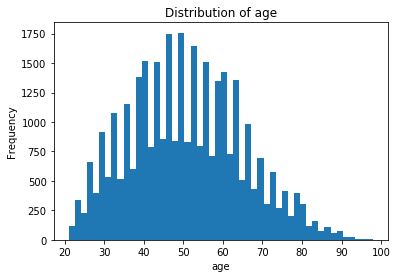

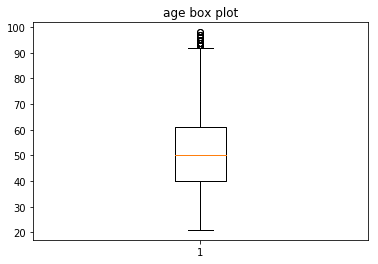

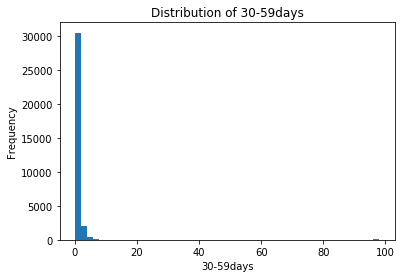

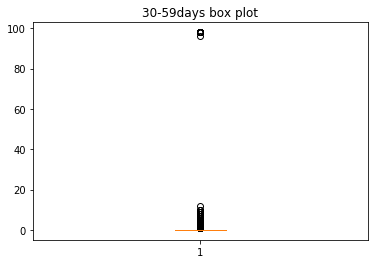

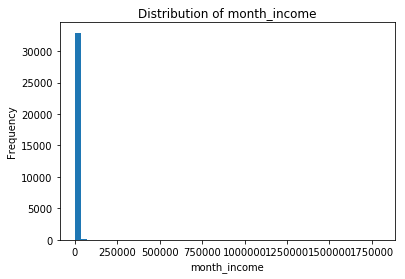

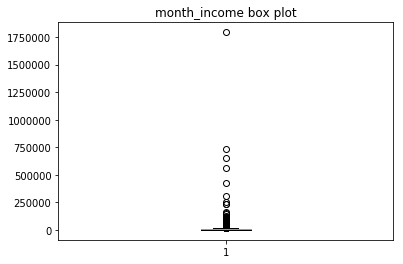

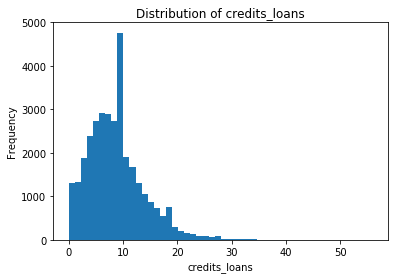

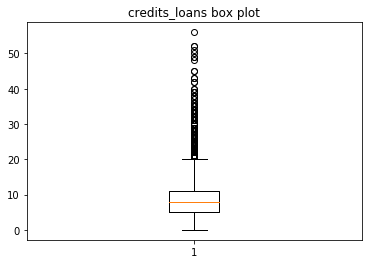

In [15]:
for feature in  ['age', '30-59days', 'month_income', 'credits_loans']:
    util.exploratory_plots(credit, feature, 50)

In [22]:
clean.limit_outliers(credit, '30-59days', 1)

In [23]:
clean.limit_outliers(credit, 'month_income', 30000)

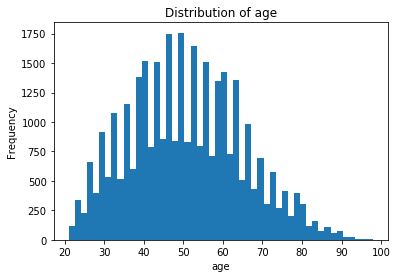

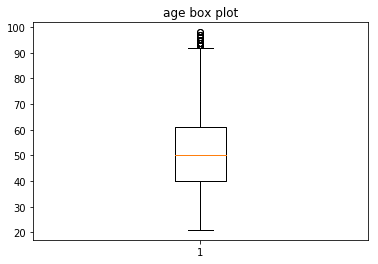

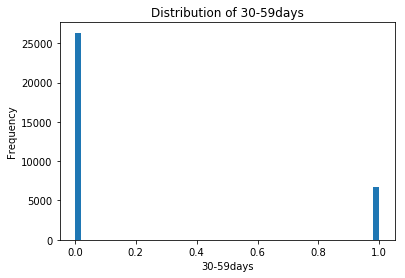

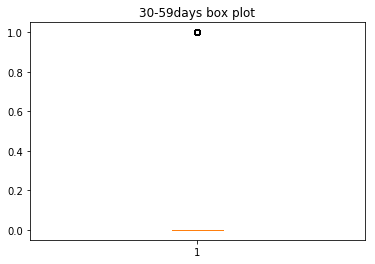

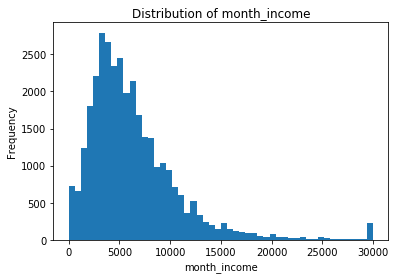

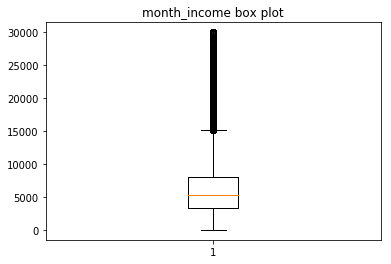

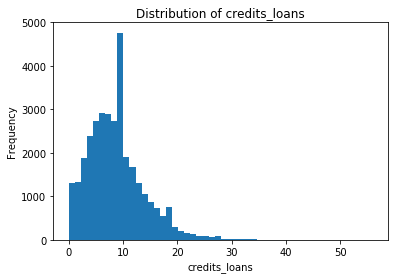

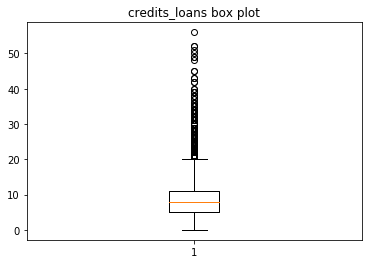

In [24]:
for feature in  ['age', '30-59days', 'month_income', 'credits_loans']:
    util.exploratory_plots(credit, feature, 50)

In [25]:
credit.head()

,delinquency,age,zipcode,30-59days,month_income,credits_loans
0,0,55,60601,0,0.0,2
1,0,71,60601,0,15666.0,7
2,0,51,60601,0,4200.0,5
3,0,55,60601,1,9052.0,12
4,0,45,60601,0,10406.0,4


In [26]:
x_train, x_test, y_train, y_test = clean.split(credit, 'delinquency', 0.3)

In [27]:
k_list = [5, 10, 15, 20, 25]
weights_list =['uniform', 'distance']

In [28]:
results_dict = {}

In [29]:
classifiers.knn_dif_models(k_list, weights_list, results_dict, x_train, y_train, x_test)

In [30]:
criterion_list = ['gini', 'entropy']
splitter_list = ['best', 'random']
max_depth_list = [2, 5, 10, 15]

In [31]:
classifiers.dtree_dif_models(results_dict, criterion_list, splitter_list, max_depth_list, x_train, y_train, x_test)

In [32]:
c_list = [1, 3, 5, 7, 9]
penalty_list = ['l1', 'l2']

In [33]:
classifiers.logistic_dif_models(results_dict, c_list, penalty_list, x_train, y_train, x_test)

In [34]:
n_estimators_list = [25, 50, 75]
criterion_list = ['gini', 'entropy']
max_features_list = ['auto', 'log2'] 

In [36]:
classifiers.rf_dif_models(results_dict, n_estimators_list, criterion_list, max_features_list, x_train, y_train, x_test)

In [37]:
n_estimators_list = [25, 50, 75]
max_features_list = [1,2,3]

In [38]:
classifiers.bag_dif_models(results_dict, n_estimators_list, max_features_list, x_train, y_train, x_test)

In [44]:
n_estimators_list = [25, 50, 75, 100]

In [45]:
classifiers.boost_dif_models(results_dict, n_estimators_list, x_train, y_train, x_test)

In [52]:
final_results = classifiers.present_results_simp(y_test, results_dict)
final_results

C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\jesus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


,Model,Accuracy,Precision,Precision top 1%,Precision top 2%,Precision top 5%,Precision top 10%,Precision top 20%,Precision top 30%,Precision top 50%,Recall,Recall top 1%,Recall top 2%,Recall top 5%,Recall top 10%,Recall top 20%,Recall top 30%,Recall top 50%,F 1
0,"knn: 5, uniform",0.800464,0.068327,0.0625,0.06250,0.038462,0.043716,0.043732,0.057471,0.064368,0.242300,0.333333,0.166667,0.142857,0.181818,0.194805,0.230769,0.248889,0.106594
1,"knn: 5, distance",0.790275,0.086856,0.0625,0.06250,0.064103,0.071038,0.067055,0.078544,0.086207,0.230061,0.250000,0.166667,0.185185,0.209677,0.200000,0.222826,0.240385,0.126103
2,"knn: 10, uniform",0.822960,0.013897,0.0625,0.03125,0.012821,0.005464,0.008746,0.013410,0.018391,0.315789,1.000000,1.000000,0.500000,0.333333,0.250000,0.350000,0.400000,0.026622
3,"knn: 10, distance",0.810047,0.044007,0.0625,0.03125,0.038462,0.038251,0.032070,0.038314,0.042529,0.246753,0.500000,0.166667,0.272727,0.225806,0.196429,0.235294,0.248322,0.074693
4,"knn: 15, uniform",0.823061,0.009265,0.0000,0.00000,0.000000,0.010929,0.005831,0.011494,0.013793,0.271186,0.000000,0.000000,0.000000,0.333333,0.200000,0.333333,0.352941,0.017917
5,"knn: 15, distance",0.817210,0.022583,0.0625,0.03125,0.025641,0.032787,0.020408,0.022989,0.021839,0.239264,1.000000,1.000000,0.500000,0.315789,0.233333,0.250000,0.240506,0.041270
6,"knn: 20, uniform",0.825179,0.001737,0.0000,0.00000,0.000000,0.000000,0.000000,0.003831,0.003448,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.375000,0.003450
7,"knn: 20, distance",0.820942,0.016792,0.0000,0.00000,0.000000,0.016393,0.011662,0.015326,0.014943,0.273585,0.000000,0.000000,0.000000,0.230769,0.190476,0.258065,0.254902,0.031642
8,"knn: 25, uniform",0.824776,0.001158,0.0000,0.00000,0.000000,0.000000,0.000000,0.001916,0.002299,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.285714,0.002298
9,"knn: 25, distance",0.821951,0.009844,0.0000,0.00000,0.000000,0.010929,0.008746,0.009579,0.008046,0.236111,0.000000,0.000000,0.000000,0.250000,0.230769,0.277778,0.205882,0.018899


In [53]:
final_results.nlargest(5, 'Accuracy')

,Model,Accuracy,Precision,Precision top 1%,Precision top 2%,Precision top 5%,Precision top 10%,Precision top 20%,Precision top 30%,Precision top 50%,Recall,Recall top 1%,Recall top 2%,Recall top 5%,Recall top 10%,Recall top 20%,Recall top 30%,Recall top 50%,F 1
59,Boosting: 75,0.827197,0.174291,0.1875,0.21875,0.205128,0.191257,0.177843,0.176245,0.185057,0.511905,0.75,0.700000,0.533333,0.564516,0.544643,0.544379,0.545763,0.260043
57,Boosting: 25,0.826894,0.180660,0.2500,0.28125,0.230769,0.213115,0.195335,0.189655,0.196552,0.508972,0.80,0.750000,0.545455,0.573529,0.544715,0.543956,0.549839,0.266667
55,"Bagging: 75, 2",0.826591,0.005790,0.0000,0.00000,0.000000,0.000000,0.002915,0.007663,0.008046,0.833333,0.00,0.000000,0.000000,0.000000,1.000000,0.800000,0.875000,0.011501
23,"d_tree: entropy, random, 5",0.826390,0.011581,0.0000,0.00000,0.000000,0.000000,0.000000,0.009579,0.012644,0.588235,0.00,0.000000,0.000000,0.000000,0.000000,0.625000,0.733333,0.022714
58,Boosting: 50,0.826390,0.174870,0.2500,0.25000,0.217949,0.207650,0.183673,0.180077,0.189655,0.505017,0.80,0.727273,0.548387,0.584615,0.533898,0.534091,0.542763,0.259785


In [54]:
final_results.nlargest(5, 'Precision')

,Model,Accuracy,Precision,Precision top 1%,Precision top 2%,Precision top 5%,Precision top 10%,Precision top 20%,Precision top 30%,Precision top 50%,Recall,Recall top 1%,Recall top 2%,Recall top 5%,Recall top 10%,Recall top 20%,Recall top 30%,Recall top 50%,F 1
45,"RF: 75, gini, log2",0.811359,0.224088,0.3750,0.34375,0.217949,0.234973,0.212828,0.204981,0.212644,0.422028,0.545455,0.611111,0.386364,0.467391,0.424419,0.400749,0.415730,0.292738
37,"RF: 25, gini, log2",0.806920,0.223509,0.2500,0.28125,0.217949,0.240437,0.221574,0.212644,0.220690,0.402503,0.500000,0.473684,0.361702,0.448980,0.397906,0.386760,0.399168,0.287416
36,"RF: 25, gini, auto",0.809039,0.222351,0.2500,0.37500,0.243590,0.218579,0.206997,0.206897,0.217241,0.411135,0.500000,0.521739,0.372549,0.408163,0.383784,0.381625,0.398734,0.288613
39,"RF: 25, entropy, log2",0.812065,0.221772,0.3125,0.43750,0.294872,0.234973,0.215743,0.201149,0.212644,0.424612,0.555556,0.666667,0.460000,0.462366,0.432749,0.408560,0.428241,0.291366
46,"RF: 75, entropy, auto",0.811863,0.218298,0.4375,0.34375,0.217949,0.218579,0.218659,0.208812,0.208046,0.422646,0.700000,0.578947,0.377778,0.439560,0.436047,0.405204,0.407658,0.287896


In [55]:
final_results.nlargest(5, 'Recall')

,Model,Accuracy,Precision,Precision top 1%,Precision top 2%,Precision top 5%,Precision top 10%,Precision top 20%,Precision top 30%,Precision top 50%,Recall,Recall top 1%,Recall top 2%,Recall top 5%,Recall top 10%,Recall top 20%,Recall top 30%,Recall top 50%,F 1
55,"Bagging: 75, 2",0.826591,0.005790,0.0000,0.00000,0.000000,0.000000,0.002915,0.007663,0.008046,0.833333,0.00,0.00,0.000000,0.000000,1.000000,0.800000,0.875000,0.011501
52,"Bagging: 50, 2",0.826087,0.004053,0.0000,0.00000,0.000000,0.000000,0.000000,0.003831,0.005747,0.636364,0.00,0.00,0.000000,0.000000,0.000000,0.500000,0.714286,0.008055
23,"d_tree: entropy, random, 5",0.826390,0.011581,0.0000,0.00000,0.000000,0.000000,0.000000,0.009579,0.012644,0.588235,0.00,0.00,0.000000,0.000000,0.000000,0.625000,0.733333,0.022714
59,Boosting: 75,0.827197,0.174291,0.1875,0.21875,0.205128,0.191257,0.177843,0.176245,0.185057,0.511905,0.75,0.70,0.533333,0.564516,0.544643,0.544379,0.545763,0.260043
57,Boosting: 25,0.826894,0.180660,0.2500,0.28125,0.230769,0.213115,0.195335,0.189655,0.196552,0.508972,0.80,0.75,0.545455,0.573529,0.544715,0.543956,0.549839,0.266667


In [56]:
final_results.nlargest(5, 'F 1')

,Model,Accuracy,Precision,Precision top 1%,Precision top 2%,Precision top 5%,Precision top 10%,Precision top 20%,Precision top 30%,Precision top 50%,Recall,Recall top 1%,Recall top 2%,Recall top 5%,Recall top 10%,Recall top 20%,Recall top 30%,Recall top 50%,F 1
45,"RF: 75, gini, log2",0.811359,0.224088,0.3750,0.34375,0.217949,0.234973,0.212828,0.204981,0.212644,0.422028,0.545455,0.611111,0.386364,0.467391,0.424419,0.400749,0.415730,0.292738
39,"RF: 25, entropy, log2",0.812065,0.221772,0.3125,0.43750,0.294872,0.234973,0.215743,0.201149,0.212644,0.424612,0.555556,0.666667,0.460000,0.462366,0.432749,0.408560,0.428241,0.291366
36,"RF: 25, gini, auto",0.809039,0.222351,0.2500,0.37500,0.243590,0.218579,0.206997,0.206897,0.217241,0.411135,0.500000,0.521739,0.372549,0.408163,0.383784,0.381625,0.398734,0.288613
46,"RF: 75, entropy, auto",0.811863,0.218298,0.4375,0.34375,0.217949,0.218579,0.218659,0.208812,0.208046,0.422646,0.700000,0.578947,0.377778,0.439560,0.436047,0.405204,0.407658,0.287896
37,"RF: 25, gini, log2",0.806920,0.223509,0.2500,0.28125,0.217949,0.240437,0.221574,0.212644,0.220690,0.402503,0.500000,0.473684,0.361702,0.448980,0.397906,0.386760,0.399168,0.287416


In [57]:
final_results.nlargest(5, 'Precision top 1%')

,Model,Accuracy,Precision,Precision top 1%,Precision top 2%,Precision top 5%,Precision top 10%,Precision top 20%,Precision top 30%,Precision top 50%,Recall,Recall top 1%,Recall top 2%,Recall top 5%,Recall top 10%,Recall top 20%,Recall top 30%,Recall top 50%,F 1
46,"RF: 75, entropy, auto",0.811863,0.218298,0.4375,0.34375,0.217949,0.218579,0.218659,0.208812,0.208046,0.422646,0.700000,0.578947,0.377778,0.439560,0.436047,0.405204,0.407658,0.287896
38,"RF: 25, entropy, auto",0.809341,0.217140,0.3750,0.31250,0.217949,0.224044,0.212828,0.201149,0.209195,0.410734,0.666667,0.588235,0.395349,0.450549,0.424419,0.391791,0.405345,0.284091
43,"RF: 50, entropy, log2",0.812368,0.206717,0.3750,0.31250,0.205128,0.213115,0.189504,0.181992,0.193103,0.421488,0.600000,0.666667,0.410256,0.469880,0.419355,0.399160,0.414815,0.277389
45,"RF: 75, gini, log2",0.811359,0.224088,0.3750,0.34375,0.217949,0.234973,0.212828,0.204981,0.212644,0.422028,0.545455,0.611111,0.386364,0.467391,0.424419,0.400749,0.415730,0.292738
39,"RF: 25, entropy, log2",0.812065,0.221772,0.3125,0.43750,0.294872,0.234973,0.215743,0.201149,0.212644,0.424612,0.555556,0.666667,0.460000,0.462366,0.432749,0.408560,0.428241,0.291366


In [58]:
final_results.nlargest(5, 'Precision top 2%')

,Model,Accuracy,Precision,Precision top 1%,Precision top 2%,Precision top 5%,Precision top 10%,Precision top 20%,Precision top 30%,Precision top 50%,Recall,Recall top 1%,Recall top 2%,Recall top 5%,Recall top 10%,Recall top 20%,Recall top 30%,Recall top 50%,F 1
39,"RF: 25, entropy, log2",0.812065,0.221772,0.3125,0.43750,0.294872,0.234973,0.215743,0.201149,0.212644,0.424612,0.555556,0.666667,0.460000,0.462366,0.432749,0.408560,0.428241,0.291366
36,"RF: 25, gini, auto",0.809039,0.222351,0.2500,0.37500,0.243590,0.218579,0.206997,0.206897,0.217241,0.411135,0.500000,0.521739,0.372549,0.408163,0.383784,0.381625,0.398734,0.288613
45,"RF: 75, gini, log2",0.811359,0.224088,0.3750,0.34375,0.217949,0.234973,0.212828,0.204981,0.212644,0.422028,0.545455,0.611111,0.386364,0.467391,0.424419,0.400749,0.415730,0.292738
46,"RF: 75, entropy, auto",0.811863,0.218298,0.4375,0.34375,0.217949,0.218579,0.218659,0.208812,0.208046,0.422646,0.700000,0.578947,0.377778,0.439560,0.436047,0.405204,0.407658,0.287896
38,"RF: 25, entropy, auto",0.809341,0.217140,0.3750,0.31250,0.217949,0.224044,0.212828,0.201149,0.209195,0.410734,0.666667,0.588235,0.395349,0.450549,0.424419,0.391791,0.405345,0.284091


In [59]:
final_results.nlargest(5, 'Precision top 5%')

,Model,Accuracy,Precision,Precision top 1%,Precision top 2%,Precision top 5%,Precision top 10%,Precision top 20%,Precision top 30%,Precision top 50%,Recall,Recall top 1%,Recall top 2%,Recall top 5%,Recall top 10%,Recall top 20%,Recall top 30%,Recall top 50%,F 1
39,"RF: 25, entropy, log2",0.812065,0.221772,0.3125,0.43750,0.294872,0.234973,0.215743,0.201149,0.212644,0.424612,0.555556,0.666667,0.460000,0.462366,0.432749,0.408560,0.428241,0.291366
36,"RF: 25, gini, auto",0.809039,0.222351,0.2500,0.37500,0.243590,0.218579,0.206997,0.206897,0.217241,0.411135,0.500000,0.521739,0.372549,0.408163,0.383784,0.381625,0.398734,0.288613
41,"RF: 50, gini, log2",0.812872,0.209033,0.3125,0.31250,0.230769,0.218579,0.209913,0.189655,0.195402,0.424706,0.714286,0.714286,0.439024,0.459770,0.431138,0.409091,0.419753,0.280171
57,Boosting: 25,0.826894,0.180660,0.2500,0.28125,0.230769,0.213115,0.195335,0.189655,0.196552,0.508972,0.800000,0.750000,0.545455,0.573529,0.544715,0.543956,0.549839,0.266667
37,"RF: 25, gini, log2",0.806920,0.223509,0.2500,0.28125,0.217949,0.240437,0.221574,0.212644,0.220690,0.402503,0.500000,0.473684,0.361702,0.448980,0.397906,0.386760,0.399168,0.287416


In [60]:
final_results.nlargest(5, 'Precision top 10%')

,Model,Accuracy,Precision,Precision top 1%,Precision top 2%,Precision top 5%,Precision top 10%,Precision top 20%,Precision top 30%,Precision top 50%,Recall,Recall top 1%,Recall top 2%,Recall top 5%,Recall top 10%,Recall top 20%,Recall top 30%,Recall top 50%,F 1
37,"RF: 25, gini, log2",0.806920,0.223509,0.2500,0.28125,0.217949,0.240437,0.221574,0.212644,0.220690,0.402503,0.500000,0.473684,0.361702,0.448980,0.397906,0.386760,0.399168,0.287416
39,"RF: 25, entropy, log2",0.812065,0.221772,0.3125,0.43750,0.294872,0.234973,0.215743,0.201149,0.212644,0.424612,0.555556,0.666667,0.460000,0.462366,0.432749,0.408560,0.428241,0.291366
45,"RF: 75, gini, log2",0.811359,0.224088,0.3750,0.34375,0.217949,0.234973,0.212828,0.204981,0.212644,0.422028,0.545455,0.611111,0.386364,0.467391,0.424419,0.400749,0.415730,0.292738
38,"RF: 25, entropy, auto",0.809341,0.217140,0.3750,0.31250,0.217949,0.224044,0.212828,0.201149,0.209195,0.410734,0.666667,0.588235,0.395349,0.450549,0.424419,0.391791,0.405345,0.284091
47,"RF: 75, entropy, log2",0.811964,0.213665,0.3125,0.25000,0.192308,0.224044,0.206997,0.189655,0.189655,0.421714,0.625000,0.500000,0.348837,0.450549,0.415205,0.396000,0.397590,0.283628


In [61]:
final_results.nlargest(5, 'Precision top 20%')

,Model,Accuracy,Precision,Precision top 1%,Precision top 2%,Precision top 5%,Precision top 10%,Precision top 20%,Precision top 30%,Precision top 50%,Recall,Recall top 1%,Recall top 2%,Recall top 5%,Recall top 10%,Recall top 20%,Recall top 30%,Recall top 50%,F 1
13,"d_tree: gini, best, 15",0.800061,0.216561,0.2500,0.21875,0.205128,0.213115,0.241983,0.231801,0.222989,0.372881,0.444444,0.466667,0.372093,0.390000,0.406863,0.398026,0.388778,0.273993
37,"RF: 25, gini, log2",0.806920,0.223509,0.2500,0.28125,0.217949,0.240437,0.221574,0.212644,0.220690,0.402503,0.500000,0.473684,0.361702,0.448980,0.397906,0.386760,0.399168,0.287416
46,"RF: 75, entropy, auto",0.811863,0.218298,0.4375,0.34375,0.217949,0.218579,0.218659,0.208812,0.208046,0.422646,0.700000,0.578947,0.377778,0.439560,0.436047,0.405204,0.407658,0.287896
39,"RF: 25, entropy, log2",0.812065,0.221772,0.3125,0.43750,0.294872,0.234973,0.215743,0.201149,0.212644,0.424612,0.555556,0.666667,0.460000,0.462366,0.432749,0.408560,0.428241,0.291366
38,"RF: 25, entropy, auto",0.809341,0.217140,0.3750,0.31250,0.217949,0.224044,0.212828,0.201149,0.209195,0.410734,0.666667,0.588235,0.395349,0.450549,0.424419,0.391791,0.405345,0.284091


In [62]:
final_results.nlargest(5, 'Precision top 30%')

,Model,Accuracy,Precision,Precision top 1%,Precision top 2%,Precision top 5%,Precision top 10%,Precision top 20%,Precision top 30%,Precision top 50%,Recall,Recall top 1%,Recall top 2%,Recall top 5%,Recall top 10%,Recall top 20%,Recall top 30%,Recall top 50%,F 1
13,"d_tree: gini, best, 15",0.800061,0.216561,0.2500,0.21875,0.205128,0.213115,0.241983,0.231801,0.222989,0.372881,0.444444,0.466667,0.372093,0.390000,0.406863,0.398026,0.388778,0.273993
21,"d_tree: entropy, best, 15",0.803793,0.213665,0.2500,0.21875,0.205128,0.185792,0.209913,0.214559,0.216092,0.385983,0.571429,0.538462,0.390244,0.382022,0.409091,0.413284,0.406048,0.275065
37,"RF: 25, gini, log2",0.806920,0.223509,0.2500,0.28125,0.217949,0.240437,0.221574,0.212644,0.220690,0.402503,0.500000,0.473684,0.361702,0.448980,0.397906,0.386760,0.399168,0.287416
40,"RF: 50, gini, auto",0.811964,0.211349,0.3125,0.25000,0.192308,0.213115,0.212828,0.210728,0.209195,0.420992,0.500000,0.470588,0.348837,0.428571,0.421965,0.416667,0.419355,0.281419
46,"RF: 75, entropy, auto",0.811863,0.218298,0.4375,0.34375,0.217949,0.218579,0.218659,0.208812,0.208046,0.422646,0.700000,0.578947,0.377778,0.439560,0.436047,0.405204,0.407658,0.287896


In [63]:
final_results.nlargest(5, 'Precision top 50%')

,Model,Accuracy,Precision,Precision top 1%,Precision top 2%,Precision top 5%,Precision top 10%,Precision top 20%,Precision top 30%,Precision top 50%,Recall,Recall top 1%,Recall top 2%,Recall top 5%,Recall top 10%,Recall top 20%,Recall top 30%,Recall top 50%,F 1
13,"d_tree: gini, best, 15",0.800061,0.216561,0.2500,0.21875,0.205128,0.213115,0.241983,0.231801,0.222989,0.372881,0.444444,0.466667,0.372093,0.390000,0.406863,0.398026,0.388778,0.273993
37,"RF: 25, gini, log2",0.806920,0.223509,0.2500,0.28125,0.217949,0.240437,0.221574,0.212644,0.220690,0.402503,0.500000,0.473684,0.361702,0.448980,0.397906,0.386760,0.399168,0.287416
36,"RF: 25, gini, auto",0.809039,0.222351,0.2500,0.37500,0.243590,0.218579,0.206997,0.206897,0.217241,0.411135,0.500000,0.521739,0.372549,0.408163,0.383784,0.381625,0.398734,0.288613
21,"d_tree: entropy, best, 15",0.803793,0.213665,0.2500,0.21875,0.205128,0.185792,0.209913,0.214559,0.216092,0.385983,0.571429,0.538462,0.390244,0.382022,0.409091,0.413284,0.406048,0.275065
39,"RF: 25, entropy, log2",0.812065,0.221772,0.3125,0.43750,0.294872,0.234973,0.215743,0.201149,0.212644,0.424612,0.555556,0.666667,0.460000,0.462366,0.432749,0.408560,0.428241,0.291366
